# Review: Data Analysis for Titanic

## Preparation

- Download and Install [Anaconda](https://www.continuum.io/downloads) (Python 3 version)
- Run command in a new shell: `jupyter lab`
- If you run jupyter lab in a linux server through ssh, open a new terminal
    - `ssh -L 8000:localhost:(jupyter port, default is 8888) (user)@(server address)`
    - after log in, `jupyter notebook list`, check and copy the token of your jupyter
    - open browser http://localhost:8000/, enter the token
- Create a new notebook: Left-upper area -> "+" (New launcher) -> Notebook -> Python 3

## Contents

1. Load and Format Data
    - Rename
    - Index and Reindex
    - String Operations in Series
2. Summary Tables
3. Bivariate Association
4. Data Cleaning
5. Machine Learning: Classification
    - ROC and AUC
    - Logistic Regression
    - Tree-based Methods
    - Variable Selection

## Review (1.1): Load Data

In [158]:
# Load modules and set options
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, linear_model, tree, ensemble

np.set_printoptions(precision = 3)
pd.set_option('precision', 3)
%matplotlib inline

In [2]:
np.set_printoptions(threshold = 100)
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 15)

In [3]:
# Load data
da = pd.read_csv("Titanic.csv")
da.shape

(891, 12)

In [4]:
da.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.925,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.050,NaN,S


In [5]:
# DT.replace(to_replace, value): replace values in data
da.replace({"Sex": {"male": 1, "female": 0}}).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",1,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mr...",0,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, ...",0,26.0,0,0,STON/O2. 31...,7.925,NaN,S
3,4,1,1,"Futrelle, M...",0,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. ...",1,35.0,0,0,373450,8.050,NaN,S


## Review (1.2): Format Data: Set and Reset Index

In [6]:
da = da.set_index("PassengerId")
da.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.283,C85,C
3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.925,NaN,S
4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.100,C123,S
5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.050,NaN,S


In [7]:
da.reset_index().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.925,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.050,NaN,S


## Review (1.3): Format Data: Strings in Series

In [8]:
# Select a string column
cabin_S = da["Cabin"]
cabin_S.head()

PassengerId
1     NaN
2     C85
3     NaN
4    C123
5     NaN
Name: Cabin, dtype: object

In [9]:
pd.value_counts(cabin_S)

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
C22 C26        3
D              3
E101           3
              ..
D6             1
C111           1
E38            1
B94            1
E58            1
E17            1
D9             1
Name: Cabin, Length: 147, dtype: int64

In [10]:
# Use string operations with Series.str
cabin_S.str[0].head()

PassengerId
1    NaN
2      C
3    NaN
4      C
5    NaN
Name: Cabin, dtype: object

In [11]:
# We can use regular expression as well
cabin_df = cabin_S.str.extract('([a-zA-Z]+)(\d+)', expand=True)
cabin_df.head()

,0,1
PassengerId,,
1,NaN,NaN
2,C,85
3,NaN,NaN
4,C,123
5,NaN,NaN


In [54]:
# DF.rename(index, columns): use a dict or function to change row/column names
# Numeric strings with NA values can only convert to float rather than int
cabin_df = cabin_df.rename(columns = {0: "cabin_level", 1: "cabin_pos"})
cabin_df["cabin_pos"] = cabin_df["cabin_pos"].astype("float")
cabin_df.head()

,cabin_level,cabin_pos
PassengerId,,
1,NaN,NaN
2,C,85.0
3,NaN,NaN
4,C,123.0
5,NaN,NaN


## Review (1.5): Format Data: Strings in Series

In [55]:
# Observe common patterns for name
da["Name"].tolist()[:10]

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)']

In [56]:
# split by "," or "." with <= 2 total splits, "[]" indicates any character matched in the bracket
name_df = da["Name"].str.split("[,.]", expand=True, n=2)
name_df.head()

,0,1,2
PassengerId,,,
1,Braund,Mr,Owen Harris
2,Cumings,Mrs,John Bradl...
3,Heikkinen,Miss,Laina
4,Futrelle,Mrs,Jacques He...
5,Allen,Mr,William Henry


In [57]:
# assign column name directly
name_df.columns = ["name_first", "name_prefix", "name_last"]
name_df.describe()

,name_first,name_prefix,name_last
count,891,891,891
unique,667,17,799
top,Andersson,Mr,John
freq,9,517,9


## Review (1.6): Format Data: Strings in Series

In [58]:
ticket_S = da["Ticket"]
ticket_S.head()

PassengerId
1         A/5 21171
2          PC 17599
3    STON/O2. 31...
4            113803
5            373450
Name: Ticket, dtype: object

In [59]:
ticket_df = ticket_S.str.split(" ", expand=True)
ticket_df.head()

,0,1,2
PassengerId,,,
1,A/5,21171,None
2,PC,17599,None
3,STON/O2.,3101282,None
4,113803,None,None
5,373450,None,None


In [60]:
# When fill NA values, DF.fillna also support forward/backward fill along axis
ticket_fill_df = ticket_df.fillna(method="ffill", axis=1)
ticket_fill_df.head()

,0,1,2
PassengerId,,,
1,A/5,21171,21171
2,PC,17599,17599
3,STON/O2.,3101282,3101282
4,113803,113803,113803
5,373450,373450,373450


In [61]:
# Convert string to numeric coercely with NA
ticket_S = pd.to_numeric(ticket_fill_df[2], errors="coerce").rename("ticket")
ticket_S

PassengerId
1      2.117e+04
2      1.760e+04
3      3.101e+06
4      1.138e+05
5      3.734e+05
6      3.309e+05
7      1.746e+04
         ...    
885    3.921e+05
886    3.827e+05
887    2.115e+05
888    1.121e+05
889    6.607e+03
890    1.114e+05
891    3.704e+05
Name: ticket, Length: 891, dtype: float64

## Review (2.1): Summary Tables

In [62]:
# Create new data frame after string operations
da_c = da.drop(["Cabin", "Name", "Ticket"], axis=1).join([cabin_df, name_df, ticket_S])
da_c.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_level,cabin_pos,name_first,name_prefix,name_last,ticket
PassengerId,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.250,S,NaN,NaN,Braund,Mr,Owen Harris,2.117e+04
2,1,1,female,38.0,1,0,71.283,C,C,85.0,Cumings,Mrs,John Bradl...,1.760e+04
3,1,3,female,26.0,0,0,7.925,S,NaN,NaN,Heikkinen,Miss,Laina,3.101e+06
4,1,1,female,35.0,1,0,53.100,S,C,123.0,Futrelle,Mrs,Jacques He...,1.138e+05
5,0,3,male,35.0,0,0,8.050,S,NaN,NaN,Allen,Mr,William Henry,3.734e+05


In [63]:
# pd.concat(objs, axis, keys): concat multiple Series/DataFrames
pd.concat([da_c.dtypes, da_c.count()], axis=1, keys=["Type", "N"])

,Type,N
Survived,int64,891
Pclass,int64,891
Sex,object,891
Age,float64,714
SibSp,int64,891
Parch,int64,891
Fare,float64,891
Embarked,object,889
cabin_level,object,200
cabin_pos,float64,200


In [64]:
# DF.describe(percentile): mainly for numeric data
da_c.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_pos,ticket
count,891.000,891.000,714.000,891.000,891.000,891.000,200.000,8.870e+02
mean,0.384,2.309,29.699,0.523,0.382,32.204,50.490,2.983e+05
std,0.487,0.836,14.526,1.103,0.806,49.693,35.395,6.576e+05
min,0.000,1.000,0.420,0.000,0.000,0.000,2.000,3.000e+00
25%,0.000,2.000,20.125,0.000,0.000,7.910,22.000,1.488e+04
50%,0.000,3.000,28.000,0.000,0.000,14.454,43.000,1.123e+05
75%,1.000,3.000,38.000,1.000,0.000,31.000,77.250,3.471e+05
max,1.000,3.000,80.000,8.000,6.000,512.329,148.000,3.101e+06


## Review (2.2): Summary Tables for Frequency

In [65]:
# DF.apply(func, axis): apply axis-wise function for each row/column
# pd.value_counts(values, sort, ascending): count values in a Series/list
da_c.apply(lambda x: pd.Series(pd.value_counts(x).index[:5]))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_level,cabin_pos,name_first,name_prefix,name_last,ticket
0,0.0,3.0,male,24.0,0,0,8.050,S,C,33.0,Andersson,Mr,John,1.601e+03
1,1.0,1.0,female,22.0,1,1,13.000,C,B,6.0,Sage,Miss,James,2.343e+03
2,NaN,2.0,NaN,18.0,2,2,7.896,Q,E,2.0,Goodwin,Mrs,Mary,3.471e+05
3,NaN,NaN,NaN,19.0,4,5,7.750,NaN,D,22.0,Panula,Master,William,2.144e+03
4,NaN,NaN,NaN,30.0,3,3,26.000,NaN,A,23.0,Johnson,Dr,Ivan,3.101e+06


In [66]:
da_c.apply(lambda x: pd.Series(pd.value_counts(x).values[:5]))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_level,cabin_pos,name_first,name_prefix,name_last,ticket
0,549.0,491.0,577.0,30,608,678,43,644.0,59,7,9,517,9,7
1,342.0,216.0,314.0,27,209,118,42,168.0,47,6,7,182,7,7
2,NaN,184.0,NaN,26,28,80,38,77.0,33,5,6,125,6,7
3,NaN,NaN,NaN,25,18,5,34,NaN,30,5,6,40,6,6
4,NaN,NaN,NaN,25,16,5,31,NaN,15,5,6,7,4,6


## Review (2.3): Integrated Summary Table

In [67]:
# DT.rename(index, column): rename the index and column
def summary(da):
    op = pd.concat([da.dtypes.rename("Type"), 
                    da.count().rename("N"),
                    da.describe().drop("count").T, 
                    da.apply(lambda x: pd.Series(pd.value_counts(x).index[:5])).rename(lambda x: "FreqCat{}".format(x+1)).T,
                    da.apply(lambda x: pd.Series(pd.value_counts(x).values[:5])).rename(lambda x: "FreqVal{}".format(x+1)).T], 
                   axis=1)
    return(op)
summary(da_c)

,Type,N,mean,std,min,25%,50%,75%,max,FreqCat1,FreqCat2,FreqCat3,FreqCat4,FreqCat5,FreqVal1,FreqVal2,FreqVal3,FreqVal4,FreqVal5
Age,float64,714,29.699,14.526,0.42,20.125,28.000,38.00,8.000e+01,24,22,18,19,30,30.0,27.0,26.0,25.0,25.0
Embarked,object,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,C,Q,NaN,NaN,644.0,168.0,77.0,NaN,NaN
Fare,float64,891,32.204,49.693,0.00,7.910,14.454,31.00,5.123e+02,8.05,13,7.9,7.75,26,43.0,42.0,38.0,34.0,31.0
Parch,int64,891,0.382,0.806,0.00,0.000,0.000,0.00,6.000e+00,0,1,2,5,3,678.0,118.0,80.0,5.0,5.0
Pclass,int64,891,2.309,0.836,1.00,2.000,3.000,3.00,3.000e+00,3,1,2,NaN,NaN,491.0,216.0,184.0,NaN,NaN
Sex,object,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,female,NaN,NaN,NaN,577.0,314.0,NaN,NaN,NaN
SibSp,int64,891,0.523,1.103,0.00,0.000,0.000,1.00,8.000e+00,0,1,2,4,3,608.0,209.0,28.0,18.0,16.0
Survived,int64,891,0.384,0.487,0.00,0.000,0.000,1.00,1.000e+00,0,1,NaN,NaN,NaN,549.0,342.0,NaN,NaN,NaN
cabin_level,object,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,B,E,D,A,59.0,47.0,33.0,30.0,15.0
cabin_pos,float64,200,50.490,35.395,2.00,22.000,43.000,77.25,1.480e+02,33,6,2,22,23,7.0,6.0,5.0,5.0,5.0


## Review (2.4): Groupby and MultiIndex

In [74]:
# DT.groupby(by).apply(func): apply a function on each row groups
da_groupsum = da_c.groupby(["Survived", "Sex"]).apply(summary)
da_groupsum

Type    N        mean         std     min  \
Survived Sex                                                                
0        female Age          float64   64      25.047      13.619    2.00   
                Embarked      object   81         NaN         NaN     NaN   
                Fare         float64   81      23.024      24.821    6.75   
                Parch          int64   81       1.037       1.391    0.00   
                Pclass         int64   81       2.852       0.450    1.00   
                Sex           object   81         NaN         NaN     NaN   
                SibSp          int64   81       1.210       1.815    0.00   
...                              ...  ...         ...         ...     ...   
1        male   Survived       int64  109       1.000       0.000    1.00   
                cabin_level   object   45         NaN         NaN     NaN   
                cabin_pos    float64   45      47.267      37.503    2.00   
                name_first    object  109         NaN         NaN     NaN   
                name_last     object  109         NaN         NaN     NaN   
                name_prefix   object  109         NaN         NaN     NaN   
                ticket       float64  108  249668.241  644950.477  751.00   

                                  25%        50%        75%        max  \
Survived Sex                                                             
0        female Age             16.75     24.500      33.25  5.700e+01   
                Embarked          NaN        NaN        NaN        NaN   
                Fare             8.85     15.246      27.90  1.516e+02   
                Parch            0.00      0.000       2.00  6.000e+00   
                Pclass           3.00      3.000       3.00  3.000e+00   
                Sex               NaN        NaN        NaN        NaN   
                SibSp            0.00      1.000       1.00  8.000e+00   
...                               ...        ...        ...        ...   
1        male   Survived         1.00      1.000       1.00  1.000e+00   
                cabin_level       NaN        NaN        NaN        NaN   
                cabin_pos       20.00     35.000      56.00  1.480e+02   
                name_first        NaN        NaN        NaN        NaN   
                name_last         NaN        NaN        NaN        NaN   
                name_prefix       NaN        NaN        NaN        NaN   
                ticket       11918.75  29106.000  245454.25  3.101e+06   

                              FreqCat1        FreqCat2  FreqCat3  \
Survived Sex                                                       
0        female Age                 18               9         2   
                Embarked             S               C         Q   
                Fare              7.75            31.3      14.5   
                Parch                0               2         1   
                Pclass               3               2         1   
                Sex             female             NaN       NaN   
                SibSp                0               1         3   
...                                ...             ...       ...   
1        male   Survived             1             NaN       NaN   
                cabin_level          C               E         B   
                cabin_pos           49              25        52   
                name_first        Daly        Moubarek    Coutts   
                name_last     Theodore   Mauritz Hakan    Pierre   
                name_prefix         Mr          Master        Dr   
                ticket         1.6e+03        1.75e+04  2.66e+03   

                                   FreqCat4  FreqCat5  FreqVal1  FreqVal2  \
Survived Sex                                                                
0        female Age                      45        25       5.0       4.0   
                Embarked                NaN       NaN      63.0       9.0  

In [75]:
# MultiIndex: use DF.loc[] and tuple to select subset
da_groupsum.loc[(1, "male", 'Age')]

Type        float64
N                93
mean           27.3
std            16.5
min            0.42
25%              18
50%              28
             ...   
FreqCat4         25
FreqCat5         36
FreqVal1          7
FreqVal2          6
FreqVal3          4
FreqVal4          4
FreqVal5          4
Name: (1, male, Age), Length: 19, dtype: object

In [76]:
# Unstack: pivot MultiIndex level(s) from rows to columns
da_groupsum.unstack(level=[0, 1])

Type                                 N                   \
Survived           0                 1               0           1        
Sex           female     male   female     male female male female male   
Age          float64  float64  float64  float64     64  360    197   93   
Embarked      object   object   object   object     81  468    231  109   
Fare         float64  float64  float64  float64     81  468    233  109   
Parch          int64    int64    int64    int64     81  468    233  109   
Pclass         int64    int64    int64    int64     81  468    233  109   
Sex           object   object   object   object     81  468    233  109   
SibSp          int64    int64    int64    int64     81  468    233  109   
Survived       int64    int64    int64    int64     81  468    233  109   
cabin_level   object   object   object   object      6   60     89   45   
cabin_pos    float64  float64  float64  float64      6   60     89   45   
name_first    object   object   object   object     81  468    233  109   
name_last     object   object   object   object     81  468    233  109   
name_prefix   object   object   object   object     81  468    233  109   
ticket       float64  float64  float64  float64     81  465    233  108   

                   mean                                             std  \
Survived              0                       1                       0   
Sex              female        male      female        male      female   
Age              25.047      31.618      28.848      27.276      13.619   
Embarked            NaN         NaN         NaN         NaN         NaN   
Fare             23.024      21.961      51.939      40.821      24.821   
Parch             1.037       0.207       0.515       0.358       1.391   
Pclass            2.852       2.476       1.918       2.018       0.450   
Sex                 NaN         NaN         NaN         NaN         NaN   
SibSp             1.210       0.440       0.515       0.385       1.815   
Survived          0.000       0.000       1.000       1.000       0.000   
cabin_level         NaN         NaN         NaN         NaN         NaN   
cabin_pos        30.333      56.033      49.742      47.267      27.746   
name_first          NaN         NaN         NaN         NaN         NaN   
name_last           NaN         NaN         NaN         NaN         NaN   
name_prefix         NaN         NaN         NaN         NaN         NaN   
ticket       304809.333  355992.198  203550.249  249668.241  575806.950   

                                                   min                        \
Survived                          1                  0             1           
Sex                male      female        male female male   female    male   
Age              14.056      14.175      16.505   2.00  1.0    0.750    0.42   
Embarked            NaN         NaN         NaN    NaN  NaN      NaN     NaN   
Fare             32.410      64.102      71.356   6.75  0.0    7.225    0.00   
Parch             0.601       0.821       0.646   0.00  0.0    0.000    0.00   
Pclass            0.761       0.834       0.923   1.00  1.0    1.000    1.00   
Sex                 NaN         NaN         NaN    NaN  NaN      NaN     NaN   
SibSp             1.139       0.738       0.637   0.00  0.0    0.000    0.00   
Survived          0.000       0.000       0.000   0.00  0.0    1.000    1.00   
cabin_level         NaN         NaN         NaN    NaN  NaN      NaN     NaN   
cabin_pos        35.231      34.631      37.503   6.00  2.0    2.000    2.00   
name_first          NaN         NaN         NaN    NaN  NaN      NaN     NaN   
name_last           NaN         NaN         NaN    NaN  NaN      NaN     NaN   
name_prefix         NaN         NaN         NaN    NaN  NaN      NaN     NaN   
ticket       724706.565  527410.487  644950.477   3.00  3.0  541.000  751.00   

                 25%                                       50%              \
Survived           0     

In [77]:
# Stack: pivot MultiIndex level(s) from columns to rows
da_groupsum.unstack(level=[0, 1]).stack(level=[0])

Survived                0                   1          
Sex                female      male    female      male
Age    25%        float64   float64   float64   float64
       50%             64       360       197        93
       75%             25      31.6      28.8      27.3
       FreqCat1      13.6      14.1      14.2      16.5
       FreqCat2         2         1      0.75      0.42
       FreqCat3      16.8      21.8        19        18
       FreqCat4      24.5        29        28        28
...                   ...       ...       ...       ...
ticket FreqVal5  3.47e+05  2.14e+03   1.1e+05  1.76e+04
       N         4.13e+03  2.34e+03  2.42e+04  3.77e+04
       Type             5         5         4         5
       max              3         5         3         2
       mean             3         4         3         2
       min              3         4         3         2
       std              3         4         3         2

[200 rows x 4 columns]

## Review (3.1): Bivariate Association: Num-Num

In [78]:
da_c.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_pos,ticket
Survived,1.000,-0.338,-0.077,-0.035,0.082,0.257,-0.064,-0.096
Pclass,-0.338,1.000,-0.369,0.083,0.018,-0.549,-0.037,0.286
Age,-0.077,-0.369,1.000,-0.308,-0.189,0.096,0.066,-0.107
SibSp,-0.035,0.083,-0.308,1.000,0.415,0.160,-0.064,0.046
Parch,0.082,0.018,-0.189,0.415,1.000,0.216,-0.118,-0.034
Fare,0.257,-0.549,0.096,0.160,0.216,1.000,0.052,-0.157
cabin_pos,-0.064,-0.037,0.066,-0.064,-0.118,0.052,1.000,0.029
ticket,-0.096,0.286,-0.107,0.046,-0.034,-0.157,0.029,1.000


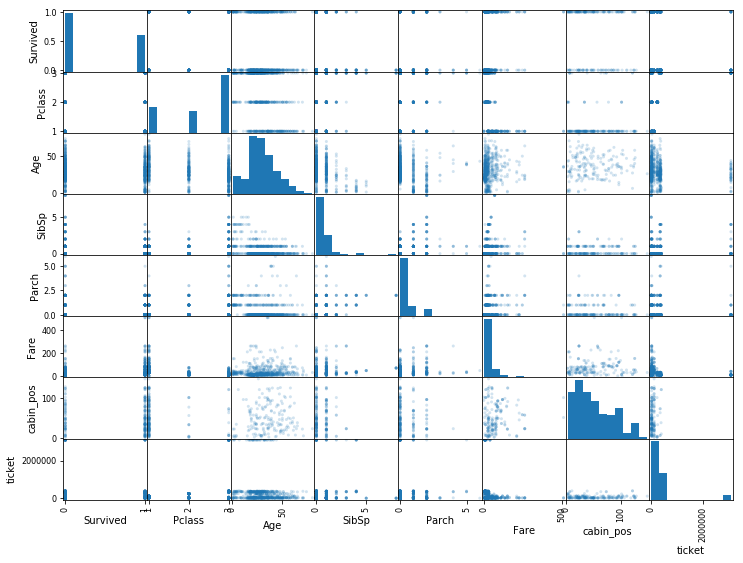

In [80]:
_ = pd.plotting.scatter_matrix(da_c, alpha = 0.2, hist_kwds = {"bins": 10}, figsize=[12, 9])

## Review (3.2): Bivariate Association: Num-Cat

In [84]:
summary_survived = da_c.groupby(["Survived"]).describe()
summary_survived

Age                                                 Fare          \
          count    mean     std   min   25%   50%   75%   max  count    mean   
Survived                                                                       
0         424.0  30.626  14.172  1.00  21.0  28.0  39.0  74.0  549.0  22.118   
1         290.0  28.344  14.951  0.42  19.0  28.0  36.0  80.0  342.0  48.395   

                                                    Parch                     \
             std  min     25%   50%   75%      max  count   mean    std  min   
Survived                                                                       
0         31.388  0.0   7.854  10.5  26.0  263.000  549.0  0.330  0.823  0.0   
1         66.597  0.0  12.475  26.0  57.0  512.329  342.0  0.465  0.772  0.0   

                             Pclass                                         \
          25%  50%  75%  max  count   mean    std  min  25%  50%  75%  max   
Survived                                                                     
0         0.0  0.0  0.0  6.0  549.0  2.532  0.736  1.0  2.0  3.0  3.0  3.0   
1         0.0  0.0  1.0  5.0  342.0  1.950  0.863  1.0  1.0  2.0  3.0  3.0   

          SibSp                                        cabin_pos          \
          count   mean    std  min  25%  50%  75%  max     count    mean   
Survived                                                                   
0         549.0  0.554  1.288  0.0  0.0  0.0  1.0  8.0      66.0  53.697   
1         342.0  0.474  0.709  0.0  0.0  0.0  1.0  4.0     134.0  48.910   

                                                ticket              \
             std  min    25%   50%   75%    max  count        mean   
Survived                                                             
0         35.232  2.0  24.50  47.0  81.0  128.0  546.0  348399.136   
1         35.500  2.0  20.25  38.0  76.0  148.0  341.0  218156.534   

                                                                      
                 std    min      25%       50%        75%        max  
Survived                                                              
0         704373.784    3.0  14879.0  236512.0  349221.75  3.101e+06  
1         566720.011  541.0  14312.0   31027.0  243880.00  3.101e+06

In [85]:
# stack and unstack function: pivot multi-index
summary_survived.stack(level=0)

25%       50%        75%  count        max  \
Survived                                                               
0        Age           21.000      28.0      39.00  424.0  7.400e+01   
         Fare           7.854      10.5      26.00  549.0  2.630e+02   
         Parch          0.000       0.0       0.00  549.0  6.000e+00   
         Pclass         2.000       3.0       3.00  549.0  3.000e+00   
         SibSp          0.000       0.0       1.00  549.0  8.000e+00   
         cabin_pos     24.500      47.0      81.00   66.0  1.280e+02   
         ticket     14879.000  236512.0  349221.75  546.0  3.101e+06   
1        Age           19.000      28.0      36.00  290.0  8.000e+01   
         Fare          12.475      26.0      57.00  342.0  5.123e+02   
         Parch          0.000       0.0       1.00  342.0  5.000e+00   
         Pclass         1.000       2.0       3.00  342.0  3.000e+00   
         SibSp          0.000       0.0       1.00  342.0  4.000e+00   
         cabin_pos     20.250      38.0      76.00  134.0  1.480e+02   
         ticket     14312.000   31027.0  243880.00  341.0  3.101e+06   

                          mean     min         std  
Survived                                            
0        Age            30.626    1.00      14.172  
         Fare           22.118    0.00      31.388  
         Parch           0.330    0.00       0.823  
         Pclass          2.532    1.00       0.736  
         SibSp           0.554    0.00       1.288  
         cabin_pos      53.697    2.00      35.232  
         ticket     348399.136    3.00  704373.784  
1        Age            28.344    0.42      14.951  
         Fare           48.395    0.00      66.597  
         Parch           0.465    0.00       0.772  
         Pclass          1.950    1.00       0.863  
         SibSp           0.474    0.00       0.709  
         cabin_pos      48.910    2.00      35.500  
         ticket     218156.534  541.00  566720.011

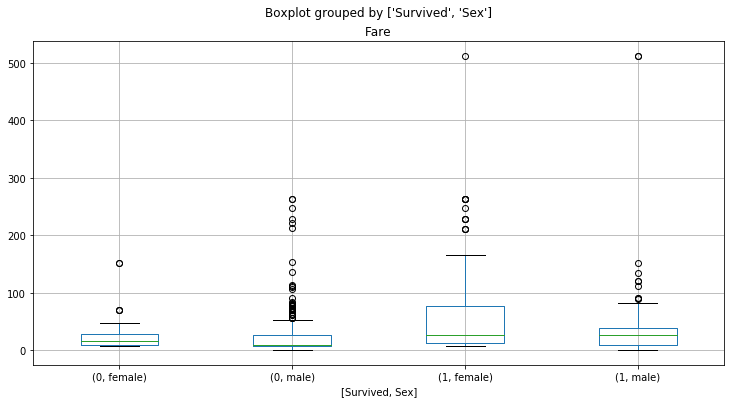

In [86]:
da.boxplot(column=["Fare"], by=["Survived", "Sex"], figsize=[12, 6])

## Review (3.3): Bivariate Association: Cat-Cat

In [87]:
table_S = da_c.groupby(["Survived", "Sex"])["Survived"].count()
table_S

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [88]:
# Unstack: pivot MultiIndex level(s) from rows to columns
table_S.unstack("Sex")

Sex,female,male
Survived,,
0,81,468
1,233,109


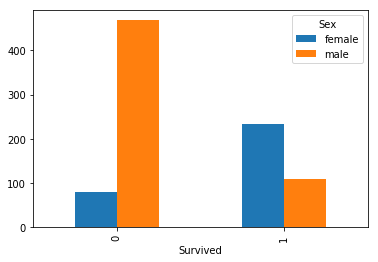

In [89]:
table_S.unstack("Sex").plot(kind = "bar")

## Review (4.1): Data Cleaning

- An ideal dataset for machine learning: all $X$ variables are numeric, complete and well distributed
- But in reality:
    - Category variables: X = (a, b, c, d)
    - Missing values: X = (1, NA, 3, NA)
    - Biased distribution: X = (1, 2, 3, 10000)
    - Identical (sparse) distribution: X = (2, 2, 2, 2)
    - Collinearity: X1 = (1, 2, 3, 4), X2 = (2, 4, 6, 8)
- We need a general procedure to deal with these problems in data

In [90]:
# Separate X and Y
Y, X = da_c['Survived'], da_c.drop('Survived', axis = 1)
Y.shape, X.shape

((891,), (891, 13))

In [91]:
# Separate numeric and categorical part of X
X_num = X.select_dtypes("number")
X_num.head()

,Pclass,Age,SibSp,Parch,Fare,cabin_pos,ticket
PassengerId,,,,,,,
1,3,22.0,1,0,7.250,NaN,2.117e+04
2,1,38.0,1,0,71.283,85.0,1.760e+04
3,3,26.0,0,0,7.925,NaN,3.101e+06
4,1,35.0,1,0,53.100,123.0,1.138e+05
5,3,35.0,0,0,8.050,NaN,3.734e+05


In [92]:
X_cat = X.select_dtypes("object")
X_cat.head()

,Sex,Embarked,cabin_level,name_first,name_prefix,name_last
PassengerId,,,,,,
1,male,S,NaN,Braund,Mr,Owen Harris
2,female,C,C,Cumings,Mrs,John Bradl...
3,female,S,NaN,Heikkinen,Miss,Laina
4,female,S,C,Futrelle,Mrs,Jacques He...
5,male,S,NaN,Allen,Mr,William Henry


## Review (4.2): Data Cleaning for String

In [101]:
# In case of creating too many dummy categories, deal with sparsity first
def sparse_cat(S, freq=0.01):
    S_freq = pd.value_counts(S) > freq * S.shape[0]
    op = S.where(S.isin(S_freq.index[S_freq]), "others")
    return(op)

X_cat_nosparse = X_cat.apply(sparse_cat)
X_cat_nosparse.head()

,Sex,Embarked,cabin_level,name_first,name_prefix,name_last
PassengerId,,,,,,
1,male,S,others,others,Mr,others
2,female,C,C,others,Mrs,others
3,female,S,others,others,Miss,others
4,female,S,C,others,Mrs,others
5,male,S,others,others,Mr,others


In [118]:
X_cat_dummy = pd.get_dummies(X_cat_nosparse, drop_first=True)
X_cat_dummy.head()

,Sex_male,Embarked_Q,Embarked_S,Embarked_others,cabin_level_B,cabin_level_C,cabin_level_D,cabin_level_E,cabin_level_F,cabin_level_others,name_first_others,name_prefix_ Miss,name_prefix_ Mr,name_prefix_ Mrs,name_prefix_others,name_last_others
PassengerId,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1
4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1
5,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1


## Review (4.3): Data Cleaning for Numeric

In [119]:
# Scale all numeric variable to mean 0 and std 1, fill missing value with mean 0
X_num_scale = ((X_num - X_num.mean()) / X_num.std()).fillna(0)
X_num_scale.head()

,Pclass,Age,SibSp,Parch,Fare,cabin_pos,ticket
PassengerId,,,,,,,
1,0.827,-0.530,0.433,-0.473,-0.502,0.000,-0.421
2,-1.565,0.571,0.433,-0.473,0.786,0.975,-0.427
3,0.827,-0.255,-0.474,-0.473,-0.489,0.000,4.262
4,-1.565,0.365,0.433,-0.473,0.420,2.049,-0.281
5,0.827,0.365,-0.474,-0.473,-0.486,0.000,0.114


In [120]:
# Create polynomial / interaction features
model_poly = preprocessing.PolynomialFeatures(interaction_only=True, include_bias=False)
X_num_poly_arr = model_poly.fit_transform(X_num_scale)
X_num_poly_arr

array([[ 0.827, -0.53 ,  0.433, ..., -0.   ,  0.212, -0.   ],
       [-1.565,  0.571,  0.433, ...,  0.767, -0.336, -0.416],
       [ 0.827, -0.255, -0.474, ..., -0.   , -2.082,  0.   ],
       ..., 
       [ 0.827,  0.   ,  0.433, ..., -0.   ,  0.078, -0.   ],
       [-1.565, -0.255, -0.474, ..., -0.122,  0.013, -0.783],
       [ 0.827,  0.158, -0.474, ..., -0.   , -0.054,  0.   ]])

In [121]:
poly_dict = {"x{}".format(i): i_val for i, i_val in enumerate(X_num.columns)}
X_num_poly = pd.DataFrame(X_num_poly_arr, X_num.index)
X_num_poly.columns = pd.Series(model_poly.get_feature_names()).str.replace('x[0-9]+', lambda x: poly_dict.get(x.group()))
X_num_poly.head()

,Pclass,Age,SibSp,Parch,Fare,cabin_pos,ticket,Pclass Age,Pclass SibSp,Pclass Parch,Pclass Fare,Pclass cabin_pos,Pclass ticket,Age SibSp,Age Parch,Age Fare,Age cabin_pos,Age ticket,SibSp Parch,SibSp Fare,SibSp cabin_pos,SibSp ticket,Parch Fare,Parch cabin_pos,Parch ticket,Fare cabin_pos,Fare ticket,cabin_pos ticket
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.827,-0.530,0.433,-0.473,-0.502,0.000,-0.421,-0.438,0.358,-0.391,-0.415,0.000,-0.349,-0.229,0.251,0.266,-0.000,0.223,-0.205,-0.217,0.000,-0.182,0.238,-0.000,0.200,-0.000,0.212,-0.000
2,-1.565,0.571,0.433,-0.473,0.786,0.975,-0.427,-0.894,-0.677,0.741,-1.231,-1.526,0.668,0.247,-0.271,0.449,0.557,-0.244,-0.205,0.340,0.422,-0.185,-0.372,-0.462,0.202,0.767,-0.336,-0.416
3,0.827,-0.255,-0.474,-0.473,-0.489,0.000,4.262,-0.211,-0.392,-0.391,-0.404,0.000,3.525,0.121,0.121,0.124,-0.000,-1.085,0.225,0.232,-0.000,-2.022,0.231,-0.000,-2.018,-0.000,-2.082,0.000
4,-1.565,0.365,0.433,-0.473,0.420,2.049,-0.281,-0.571,-0.677,0.741,-0.658,-3.207,0.439,0.158,-0.173,0.153,0.748,-0.102,-0.205,0.182,0.886,-0.121,-0.199,-0.970,0.133,0.861,-0.118,-0.575
5,0.827,0.365,-0.474,-0.473,-0.486,0.000,0.114,0.302,-0.392,-0.391,-0.402,0.000,0.094,-0.173,-0.173,-0.177,0.000,0.042,0.225,0.231,-0.000,-0.054,0.230,-0.000,-0.054,-0.000,-0.056,0.000


In [122]:
# Concat numeric and transformed categorical variables together
X = X_num_poly.join(X_cat_dummy)
X = (X - X.mean()) / X.std()
X.head()

,Pclass,Age,SibSp,Parch,Fare,cabin_pos,ticket,Pclass Age,Pclass SibSp,Pclass Parch,Pclass Fare,Pclass cabin_pos,Pclass ticket,Age SibSp,Age Parch,Age Fare,Age cabin_pos,Age ticket,SibSp Parch,SibSp Fare,SibSp cabin_pos,SibSp ticket,Parch Fare,Parch cabin_pos,Parch ticket,Fare cabin_pos,Fare ticket,cabin_pos ticket,Sex_male,Embarked_Q,Embarked_S,Embarked_others,cabin_level_B,cabin_level_C,cabin_level_D,cabin_level_E,cabin_level_F,cabin_level_others,name_first_others,name_prefix_ Miss,name_prefix_ Mr,name_prefix_ Mrs,name_prefix_others,name_last_others
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.827,-0.592,0.433,-0.473,-0.502,3.162e-17,-0.422,-0.152,0.312,-0.428,0.097,0.007,-0.785,-0.022,0.405,0.231,-0.019,0.404,-0.388,-0.408,0.032,-0.176,0.018,0.061,0.224,-0.023,0.654,-0.005,0.737,-0.307,0.619,-0.047,-0.236,-0.266,-0.187,-0.196,-0.101,0.526,0.101,-0.506,0.850,-0.404,-0.177,0.101
2,-1.565,0.638,0.433,-0.473,0.786,2.062e+00,-0.428,-0.641,-0.862,0.754,-0.495,-2.215,0.475,0.462,-0.109,0.461,1.089,-0.194,-0.388,0.196,1.647,-0.178,-0.482,-1.110,0.226,0.986,-0.319,-2.528,-1.355,-0.307,-1.614,-0.047,-0.236,3.753,-0.187,-0.196,-0.101,-1.901,0.101,-0.506,-1.175,2.474,-0.177,0.101
3,0.827,-0.285,-0.474,-0.473,-0.489,3.162e-17,4.272,0.092,-0.539,-0.428,0.105,0.007,4.014,0.334,0.276,0.053,-0.019,-1.270,-0.119,0.078,0.032,-1.597,0.013,0.061,-1.906,-0.023,-3.426,-0.005,-1.355,-0.307,0.619,-0.047,-0.236,-0.266,-0.187,-0.196,-0.101,0.526,0.101,1.973,-1.175,-0.404,-0.177,0.101
4,-1.565,0.408,0.433,-0.473,0.420,4.332e+00,-0.281,-0.295,-0.862,0.754,-0.079,-4.663,0.191,0.371,-0.012,0.090,1.467,-0.013,-0.388,0.024,3.426,-0.129,-0.340,-2.398,0.160,1.110,0.068,-3.489,-1.355,-0.307,0.619,-0.047,-0.236,3.753,-0.187,-0.196,-0.101,-1.901,0.101,-0.506,-1.175,2.474,-0.177,0.101
5,0.827,0.408,-0.474,-0.473,-0.486,3.162e-17,0.114,0.641,-0.539,-0.428,0.107,0.007,-0.236,0.035,-0.012,-0.325,-0.019,0.172,-0.119,0.077,0.032,-0.077,0.012,0.061,-0.020,-0.023,0.179,-0.005,0.737,-0.307,0.619,-0.047,-0.236,-0.266,-0.187,-0.196,-0.101,0.526,0.101,-0.506,0.850,-0.404,-0.177,0.101


## Review (4.4): Frequency and Collinearity

In [123]:
# We use the values besides most frequent and NA to check frequency
S_freq = X.apply(lambda x: pd.value_counts(x).iloc[1:].sum() / x.shape[0])
S_freq

Pclass                0.449
Age                   0.801
SibSp                 0.318
Parch                 0.239
Fare                  0.952
cabin_pos             0.224
ticket                0.992
                      ...  
cabin_level_others    0.217
name_first_others     0.010
name_prefix_ Miss     0.204
name_prefix_ Mr       0.420
name_prefix_ Mrs      0.140
name_prefix_others    0.030
name_last_others      0.010
Length: 44, dtype: float64

In [132]:
# Remove sparse variables
X = X.loc[:, S_freq > 0.01]
X.shape

(891, 43)

In [125]:
# Create a triangle correlation matrix to detect collinearity
R = np.tril(np.corrcoef(X, rowvar=0), k=-1)
R

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-0.331,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.083, -0.233,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [-0.149,  0.166,  0.063, ...,  0.   ,  0.   ,  0.   ],
       [-0.206,  0.166, -0.036, ..., -0.071,  0.   ,  0.   ],
       [-0.016, -0.03 ,  0.038, ...,  0.041, -0.113,  0.   ]])

In [128]:
print(X.columns[(np.abs(R) > 0.95).any(axis=1)])

Index([], dtype='object')


In [131]:
# Remove collinearity variables
X = X.loc[:, ~(np.abs(R) > 0.95).any(axis=1)]
X.shape

(891, 43)

## Review (5.1): Machine Learning: Classification

- Given data $(X, Y)$ with binary outcome $y_i = 0,1$ for $i = 1,\cdots,n$
- Distance between continuous $\hat{Y} = E(Y) = f(X,\theta)$ and binary $Y$:
    - Continuous Measurement: 
        - Log loss ($-\log(f(Y|\hat{Y})$): $L(Y, \hat{Y}) = -\sum_{i=1}^n\left(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\right)$
    - Binarize $\hat{Y}$ based on a threshold $\hat{Y}^{(c)} = 1(\hat{Y} > c)$
        - Misclassification error: $L(Y, \hat{Y}) = \sum_{i=1}^n1(y_i \neq \hat{y}_i^{(c)})$
        - 4 kinds of classification outcome: True Positive, True Negative, False Positive, False Negative

In [133]:
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
yhat = np.array([0.1, 0.3, 0.4, 0.6, 0.2, 0.5, 0.7, 0.8, 0.9, 1])
pd.DataFrame(metrics.confusion_matrix(y, yhat > 0.5), index = ["y0", "y1"], columns = ["yhat0", "yhat1"])

,yhat0,yhat1
y0,3,1
y1,2,4


## Review (5.2): Machine Learning: ROC and AUC
- True Positive Rate (Sensitivity): $TPR^{(c)} = 1-FNR^{(c)} = \frac{\sum_{i=1}^n1(\hat{y}_i^{(c)} = y_i = 1)}{\sum_{i=1}^n1(y_i = 1)}$
- True Negative Rate (Specificity): $TNR^{(c)} = 1-FPR^{(c)} = \frac{\sum_{i=1}^n1(\hat{y}_i^{(c)} = y_i = 0)}{\sum_{i=1}^n1(y_i = 0)}$
- Receiver operating characteristic (ROC): curve of $(1 - TNR^{(c)}, TPR^{(c)})$
- Area Under Curve (AUC): between 0 (totally false) and 1 (totally true), usually greater than 0.5 (totally random)

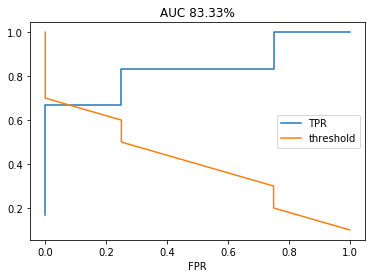

In [135]:
def ROC(Y, Yhat):
    roc = metrics.roc_curve(Y, Yhat)
    plt_df = pd.DataFrame({"FPR": roc[0], "TPR": roc[1], "threshold": roc[2]})
    plt_df.set_index("FPR").plot(title="AUC {:.2%}".format(metrics.auc(roc[0], roc[1])))
ROC(y, yhat)

## Review (5.3): CV Model Functions

- Use defined machine learning functions last class, revising for classification

In [136]:
np.random.seed(123)
cvfold = np.array_split(np.random.permutation(Y.index), 5)
for ir_v in cvfold:
    print(len(ir_v), ir_v)

179 [173 525 453 ..., 828 774 222]
178 [330 750 204 ..., 333 397 730]
178 [868 846 290 ..., 579 534 871]
178 [614 845 220 ..., 610 198 216]
178 [753 885 798 ..., 383 366 511]


In [138]:
# select fold 0 as validation set, leaving others as training set
ir_v = cvfold[0]
ir_t = np.concatenate(np.delete(cvfold, 0))
ir_v.shape, ir_t.shape

((179,), (712,))

In [139]:
# Split X and Y with training-validation index
X_t = X.loc[ir_t]
X_v = X.loc[ir_v]
Y_t = Y.loc[ir_t]
Y_v = Y.loc[ir_v]
X_t.shape, X_v.shape, Y_t.shape, Y_v.shape

((712, 43), (179, 43), (712,), (179,))

## Review (5.4): Logistic Regression
- GLM: $\hat{Y} = g^{-1}(X\beta)$ with link function $g(\cdot)$
- Logistic Regression: link binary $Y$ and linear $X\beta$ using logit function $g^{-1}(X\beta) = \frac{1}{1+\exp(-X\beta)}$
- Maximum likelihood estimator $\hat{\beta}$: minimize log loss $L(Y, \hat{Y}) = -\sum_{i=1}^n\left(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\right)$
- Regularization with penalty: $\hat{\beta} = \arg\min_{\beta}\left(L(Y, \hat{Y}) + \lambda P(\beta)\right)$
    - Ridge (L2 dist): $P(\beta) = \sum_{i=1}^p\beta_i^2$
    - Lasso (L1 dist): $P(\beta) = \sum_{i=1}^p|\beta_i|$

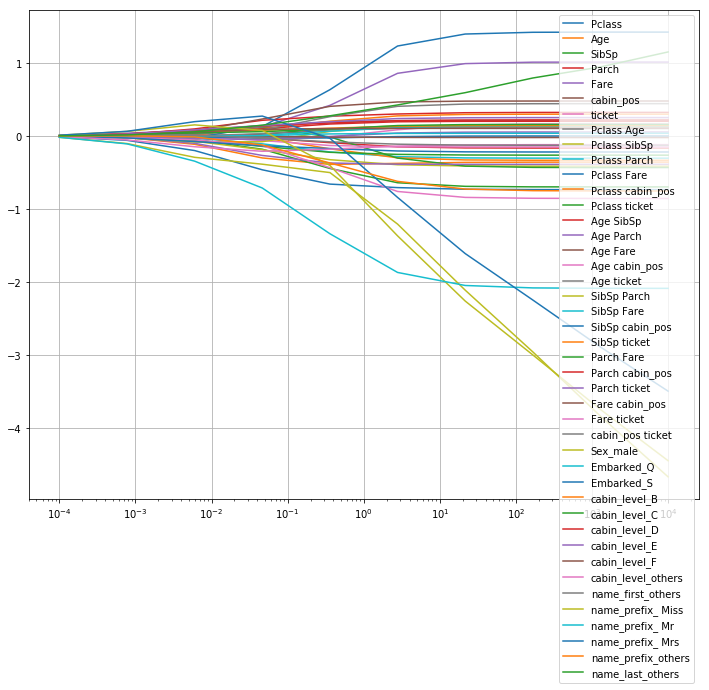

In [199]:
# Logistic Regression with Ridge
path_logreg_l2 = linear_model.logistic_regression_path(X_t, Y_t, penalty="l2")
pd.DataFrame(np.vstack(path_logreg_l2[0])[:, :-1], index=path_logreg_l2[1], columns=X.columns).plot(figsize=[12, 9], grid=True, logx=True)

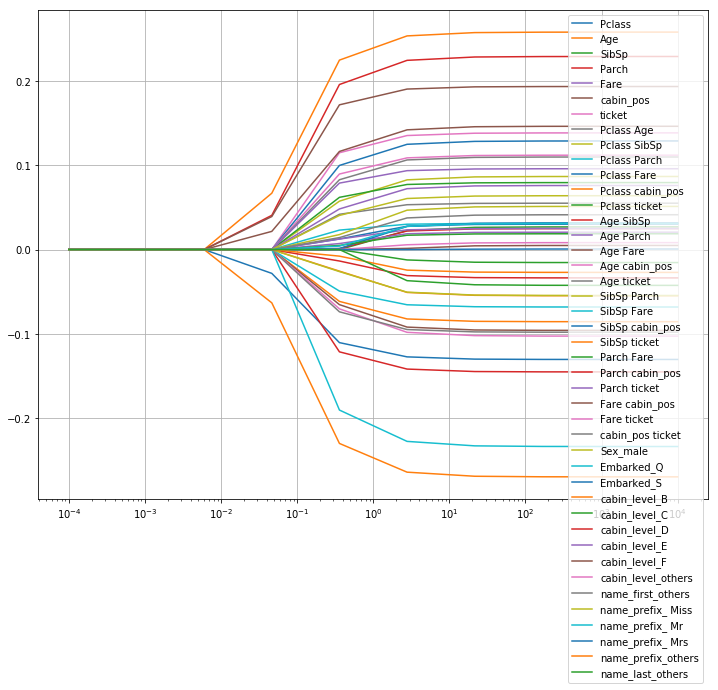

In [198]:
# Logistic Regression with Lasso
path_logreg_l1 = linear_model.logistic_regression_path(X_t, Y_t, penalty="l1", solver="liblinear")
pd.DataFrame(np.vstack(path_logreg_l1[0])[:, :-1], index=path_logreg_l1[1], columns=X.columns).plot(figsize=[12, 9], grid=True, logx=True)

In [200]:
# Default in scikit-learn, logistic regression use L2 penalty and inverse penalty coefficient C (= 1/lambda) = 1
model_logreg = linear_model.LogisticRegression(penalty='l2', C=1)
model_logreg.fit(X_t, Y_t)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [201]:
model_logreg.coef_

array([[-0.685, -0.385, -0.565, -0.125,  0.674,  0.102,  0.025,  0.106,
        -0.368, -0.26 ,  0.988, -0.253, -0.168,  0.286, -0.383,  0.449,
        -0.143,  0.204,  0.114,  0.093, -0.016,  0.247, -0.244,  0.185,
         0.022, -0.02 , -0.63 ,  0.357, -0.785,  0.032, -0.191,  0.125,
         0.124,  0.197,  0.222,  0.104, -0.156, -0.097, -0.857, -1.649,
        -0.405, -0.508,  0.335]])

In [202]:
Yhat_t = model_logreg.predict(X_t)
Yhat_v = model_logreg.predict(X_v)
Yhat_v

array([1, 0, 1, ..., 1, 0, 0])

In [203]:
Yhat_pr_t = model_logreg.predict_proba(X_t)
Yhat_pr_v = model_logreg.predict_proba(X_v)
Yhat_pr_v

array([[ 0.338,  0.662],
       [ 0.906,  0.094],
       [ 0.458,  0.542],
       ..., 
       [ 0.007,  0.993],
       [ 0.906,  0.094],
       [ 0.827,  0.173]])

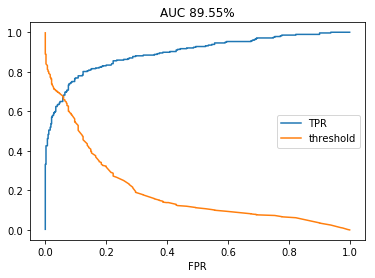

In [204]:
# Training ROC
ROC(Y_t, Yhat_pr_t[:, 1])

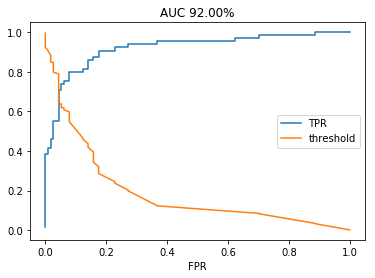

In [205]:
# Validation ROC
ROC(Y_v, Yhat_pr_v[:, 1])

## Review (5.5): Cross-validation function with classification adjustment

In [206]:
def cv_train(X, Y, cvfold, f_model=linear_model.LogisticRegression, f_loss=metrics.roc_auc_score, **kwargs):
    model_L = []
    for i_cv, ir_v in enumerate(cvfold):
        ir_t = np.concatenate(np.delete(cvfold, i_cv))
        print("CV fold: {} / {}, training / validation sample: {} / {}".format(i_cv, len(cvfold), len(ir_t), len(ir_v)))
        X_t, X_v = X.loc[ir_t], X.loc[ir_v]
        Y_t, Y_v = Y.loc[ir_t], Y.loc[ir_v]
        time_start = time.time()
        model = f_model(**kwargs)
        model.fit(X_t, Y_t)
        Yhat_t = model.predict_proba(X_t)[:, 1]
        Yhat_v = model.predict_proba(X_v)[:, 1]
        loss_t = f_loss(Y_t, Yhat_t)
        loss_v = f_loss(Y_v, Yhat_v)
        print("    Model: {}, training / validation loss {:.4f} / {:.4f}, time: {:.2f}s".format(
            model.__class__.__name__, loss_t, loss_v, time.time() - time_start))
        model_L.append(model)
    return(model_L)

In [207]:
model_L_logreg = cv_train(X, Y, cvfold, f_model=linear_model.LogisticRegression)

CV fold: 0 / 5, training / validation sample: 712 / 179
    Model: LogisticRegression, training / validation loss 0.8955 / 0.9200, time: 0.01s
CV fold: 1 / 5, training / validation sample: 713 / 178
    Model: LogisticRegression, training / validation loss 0.9055 / 0.8693, time: 0.01s
CV fold: 2 / 5, training / validation sample: 713 / 178
    Model: LogisticRegression, training / validation loss 0.9052 / 0.8540, time: 0.01s
CV fold: 3 / 5, training / validation sample: 713 / 178
    Model: LogisticRegression, training / validation loss 0.9162 / 0.8097, time: 0.01s
CV fold: 4 / 5, training / validation sample: 713 / 178
    Model: LogisticRegression, training / validation loss 0.8990 / 0.8829, time: 0.01s


In [219]:
model_L_logreg = cv_train(X, Y, cvfold, f_model=linear_model.LogisticRegression, penalty='l1', C=1)

CV fold: 0 / 5, training / validation sample: 712 / 179
    Model: LogisticRegression, training / validation loss 0.8943 / 0.9163, time: 0.02s
CV fold: 1 / 5, training / validation sample: 713 / 178
    Model: LogisticRegression, training / validation loss 0.9057 / 0.8678, time: 0.02s
CV fold: 2 / 5, training / validation sample: 713 / 178
    Model: LogisticRegression, training / validation loss 0.9047 / 0.8550, time: 0.03s
CV fold: 3 / 5, training / validation sample: 713 / 178
    Model: LogisticRegression, training / validation loss 0.9160 / 0.8108, time: 0.03s
CV fold: 4 / 5, training / validation sample: 713 / 178
    Model: LogisticRegression, training / validation loss 0.8981 / 0.8857, time: 0.02s


## Review (5.6): Tree-based Methods

In [225]:
model_L_tree = cv_train(X, Y, cvfold, tree.DecisionTreeClassifier)

CV fold: 0 / 5, training / validation sample: 712 / 179
    Model: DecisionTreeClassifier, training / validation loss 1.0000 / 0.8079, time: 0.01s
CV fold: 1 / 5, training / validation sample: 713 / 178
    Model: DecisionTreeClassifier, training / validation loss 1.0000 / 0.7593, time: 0.01s
CV fold: 2 / 5, training / validation sample: 713 / 178
    Model: DecisionTreeClassifier, training / validation loss 1.0000 / 0.7268, time: 0.01s
CV fold: 3 / 5, training / validation sample: 713 / 178
    Model: DecisionTreeClassifier, training / validation loss 1.0000 / 0.7073, time: 0.01s
CV fold: 4 / 5, training / validation sample: 713 / 178
    Model: DecisionTreeClassifier, training / validation loss 1.0000 / 0.7570, time: 0.01s


In [242]:
model_L_rf = cv_train(X, Y, cvfold, ensemble.RandomForestClassifier, n_estimators=100)

CV fold: 0 / 5, training / validation sample: 712 / 179
    Model: RandomForestClassifier, training / validation loss 0.9999 / 0.9020, time: 0.24s
CV fold: 1 / 5, training / validation sample: 713 / 178
    Model: RandomForestClassifier, training / validation loss 0.9998 / 0.8521, time: 0.25s
CV fold: 2 / 5, training / validation sample: 713 / 178
    Model: RandomForestClassifier, training / validation loss 1.0000 / 0.8711, time: 0.23s
CV fold: 3 / 5, training / validation sample: 713 / 178
    Model: RandomForestClassifier, training / validation loss 1.0000 / 0.8446, time: 0.23s
CV fold: 4 / 5, training / validation sample: 713 / 178
    Model: RandomForestClassifier, training / validation loss 1.0000 / 0.8900, time: 0.23s


In [260]:
model_L_gbt = cv_train(X, Y, cvfold, ensemble.GradientBoostingClassifier, n_estimators=300, learning_rate=0.1, max_depth=3, max_features=0.5)

CV fold: 0 / 5, training / validation sample: 712 / 179
    Model: GradientBoostingClassifier, training / validation loss 0.9991 / 0.9065, time: 0.37s
CV fold: 1 / 5, training / validation sample: 713 / 178
    Model: GradientBoostingClassifier, training / validation loss 0.9996 / 0.8726, time: 0.38s
CV fold: 2 / 5, training / validation sample: 713 / 178
    Model: GradientBoostingClassifier, training / validation loss 0.9995 / 0.8501, time: 0.37s
CV fold: 3 / 5, training / validation sample: 713 / 178
    Model: GradientBoostingClassifier, training / validation loss 0.9996 / 0.8367, time: 0.37s
CV fold: 4 / 5, training / validation sample: 713 / 178
    Model: GradientBoostingClassifier, training / validation loss 0.9996 / 0.8611, time: 0.37s


## Review (5.7): Variable Selection in Tree-based Models

In [268]:
model_tree = model_L_tree[0]
model_tree.feature_importances_

array([ 0.069,  0.011,  0.   ,  0.   ,  0.057,  0.004,  0.037,  0.019,
        0.   ,  0.   ,  0.022,  0.   ,  0.042,  0.051,  0.008,  0.053,
        0.008,  0.046,  0.014,  0.015,  0.013,  0.036,  0.023,  0.   ,
        0.052,  0.   ,  0.036,  0.006,  0.012,  0.   ,  0.003,  0.   ,
        0.004,  0.   ,  0.008,  0.   ,  0.026,  0.   ,  0.   ,  0.304,
        0.   ,  0.021,  0.   ])

In [229]:
w_df = pd.concat([pd.Series(model.feature_importances_, index=X.columns) for model in model_L_rf], axis=1)
w_df

,0,1,2,3,4
Pclass,2.822e-02,0.023,1.885e-02,3.060e-02,1.601e-02
Age,2.719e-02,0.027,3.402e-02,2.902e-02,2.542e-02
SibSp,6.491e-03,0.006,6.913e-03,6.689e-03,6.844e-03
Parch,3.970e-03,0.006,4.317e-03,5.977e-03,5.054e-03
Fare,3.505e-02,0.037,3.276e-02,3.812e-02,3.289e-02
cabin_pos,9.914e-03,0.007,1.560e-02,1.327e-02,8.345e-03
ticket,4.143e-02,0.048,4.115e-02,4.363e-02,6.253e-02
...,...,...,...,...,...
cabin_level_others,5.483e-03,0.013,1.537e-02,1.608e-02,2.074e-02
name_first_others,3.294e-03,0.003,2.665e-03,2.111e-03,1.741e-04


In [234]:
w_df.mean(axis=1).sort_values(ascending=False).head(10)

Sex_male           0.105
name_prefix_ Mr    0.098
Pclass ticket      0.054
ticket             0.047
Pclass Fare        0.041
Fare ticket        0.040
Parch Fare         0.040
SibSp ticket       0.039
Parch ticket       0.038
Age Fare           0.036
dtype: float64